<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AgeStructuredSIRD-vs-SIRD" data-toc-modified-id="AgeStructuredSIRD-vs-SIRD-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AgeStructuredSIRD vs SIRD</a></span><ul class="toc-item"><li><span><a href="#Comparisons-vs-simple-SIRD-model" data-toc-modified-id="Comparisons-vs-simple-SIRD-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Comparisons vs simple SIRD model</a></span><ul class="toc-item"><li><span><a href="#SIRD" data-toc-modified-id="SIRD-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>SIRD</a></span></li><li><span><a href="#AgeStructuredSIRD---two-equivalent-populations" data-toc-modified-id="AgeStructuredSIRD---two-equivalent-populations-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>AgeStructuredSIRD - two equivalent populations</a></span></li><li><span><a href="#AgeStructuredSIRD---two-unequally-sized,-equivalent-populations" data-toc-modified-id="AgeStructuredSIRD---two-unequally-sized,-equivalent-populations-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>AgeStructuredSIRD - two unequally sized, equivalent populations</a></span></li></ul></li></ul></li></ul></div>

# AgeStructuredSIRD vs SIRD

This notebook confirms that the AgeStructuredSIRD model returns equivalent results to the simple base SIRD model.

In [1]:
%load_ext autoreload
%autoreload 2

from Eir import AgeStructuredSIRD, SIRD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../style.mplstyle")

In [3]:
days, dt = 31, 0.1

## Comparisons vs simple SIRD model

### SIRD 

In [4]:
S0 = 10_000_000
I0 = 10
R0 = 0
beta = 1.5
gamma = 0.15
omega = 0.01

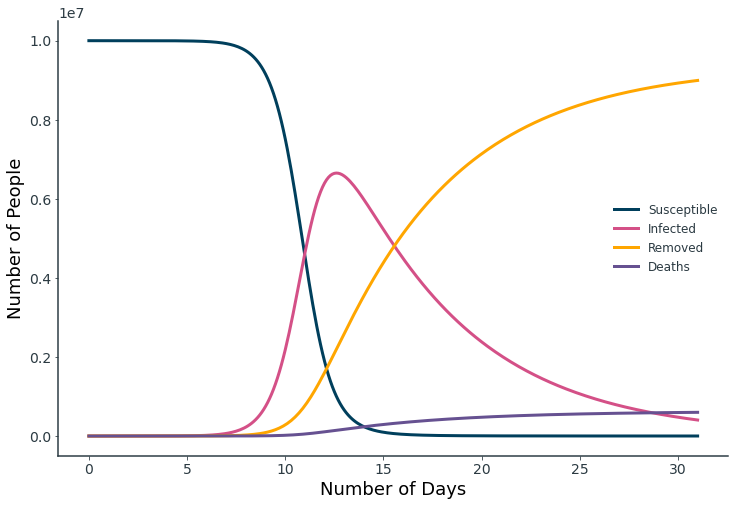

In [5]:
sim = SIRD(S0=S0, I0=I0, R0=R0, beta=beta, gamma=gamma, omega=omega)
df, fig = sim.run(days, dt)
fig

In [6]:
df

,Days,Susceptible,Infected,Removed,Deaths
0,0.0,1.000000e+07,10.000000,0.000000e+00,0.000000
1,0.1,9.999999e+06,11.339999,1.500000e-01,0.010000
2,0.2,9.999997e+06,12.859557,3.201000e-01,0.021340
3,0.3,9.999995e+06,14.582735,5.129933e-01,0.034200
4,0.4,9.999993e+06,16.536818,7.317343e-01,0.048782
...,...,...,...,...,...
306,30.6,7.081048e+02,432203.398384,8.969155e+06,597943.656053
307,30.7,7.032221e+02,425293.026638,8.975638e+06,598375.859452
308,30.8,6.984505e+02,418493.109863,8.982017e+06,598801.152478
309,30.9,6.937868e+02,411801.883815,8.988295e+06,599219.645588


### AgeStructuredSIRD - two equivalent populations

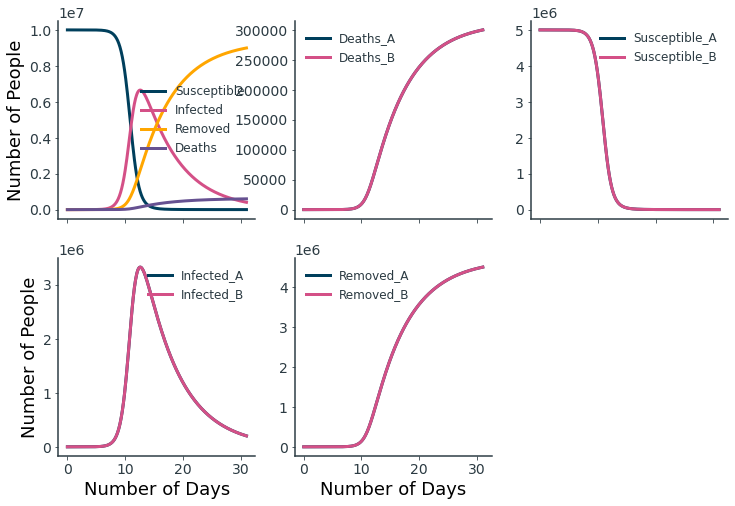

In [7]:
labels_as = ["A", "B"]
S0_as = [int(S0 / 2), int(S0 / 2)]
I0_as = [int(I0 / 2), int(I0 / 2)]
R0_as = [int(R0 / 2), int(R0 / 2)]
beta_as = np.array(
    [
        [beta, beta],
        [beta, beta],
    ]
)
gamma_as = [gamma, gamma]
omega_as = [omega, omega]

sim = AgeStructuredSIRD(labels_as, beta_as, gamma_as, omega_as, S0_as, I0_as, R0_as)
df_as, fig_as = sim.run(days, dt)
fig_as

In [8]:
# same results as base SIRD model
pd.testing.assert_frame_equal(df, df_as.iloc[:, :5])

### AgeStructuredSIRD - two unequally sized, equivalent populations
Population 'A' is equivalent to base SIRD model.

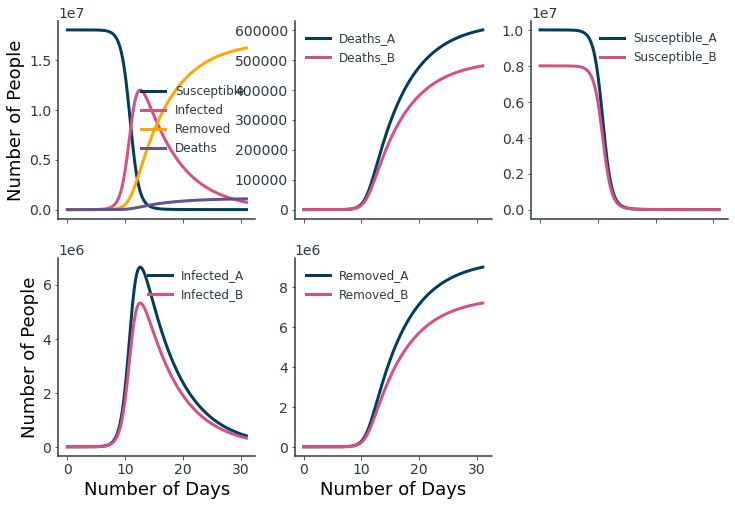

In [9]:
labels_as = ["A", "B"]
S0_as = [10_000_000, 8_000_000]
I0_as = [10, 8]
R0_as = [0, 0]
beta_as = np.array([[beta, beta], [beta, beta]])
gamma_as = [gamma, gamma]
omega_as = [omega, omega]

sim = AgeStructuredSIRD(labels_as, beta_as, gamma_as, omega_as, S0_as, I0_as, R0_as)
df_as, fig_as = sim.run(days, dt)
fig_as

In [10]:
# population A has the same results as base SIRD model
pd.testing.assert_frame_equal(
    df_as.iloc[:, 5:9].rename(
        columns={
            "Susceptible_A": "Susceptible",
            "Infected_A": "Infected",
            "Removed_A": "Removed",
            "Deaths_A": "Deaths",
        }
    ),
    df.iloc[:, 1:],
)